# Variable Information
* Name: The reviewer's name, if available.
* Location: The location or city associated with the reviewer, if provided.
* Date: The date when the review was posted.
* Rating: The star rating given by the reviewer, ranges from 1 to 5.
* Review: The textual content of the review, captures the reviewer's experience and opinions.
* Image Links: Links to images associated with the reviews, if available.

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# # Connecting to the google drive.
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Fetching the data from deive.
# data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NLP Starbucks/reviews_data.csv')
data = pd.read_csv(r'reviews_data.csv')

In [4]:
data

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...
...,...,...,...,...,...,...
845,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...,['No Images']
846,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",NaN,No Review Text,['No Images']
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",['No Images']
848,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",NaN,No Review Text,['No Images']


In [5]:
data.iloc[4,4]     # Checking for the review that what type of reviews there.

'I’m on this kick of drinking 5 cups of warm water. I work for Instacart right now and every location of Starbucks I was given free hot water because I asked for it without being charged. I really appreciate Starbucks for giving me the opportunity to do such thing. That’s why I give them five stars. They fully have my support. They’re super nice and professional and the coffee is great. Go to Starbucks.'

#### Preprocessing

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [7]:
nltk.download('punkt')
nltk.download('stopwords')

# Text cleaning and tokenization
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = ' '.join([word for word in word_tokenize(text) if word.isalnum()])  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

data['cleaned_text_review'] = data['Review'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /home/ankur/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ankur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# custom features
data['word_count'] = data['cleaned_text_review'].apply(lambda x:len(x.split()))
data['char_count'] = data['cleaned_text_review'].apply(len)

In [9]:
data

,name,location,Date,Rating,Review,Image_Links,cleaned_text_review,word_count,char_count
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],amber ladonna starbucks southwest parkway alwa...,26,179
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],starbucks fire station 436 altamonte springs f...,51,345
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,wanted go way recognize starbucks employee bil...,35,220
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],friend starbucks card work thankful worker pai...,34,208
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,kick drinking 5 cups warm water work instacart...,37,253
...,...,...,...,...,...,...,...,...,...
845,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...,['No Images'],ordered two venti frappacino without whipped c...,26,196
846,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",NaN,No Review Text,['No Images'],review text,2,11
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",['No Images'],demanded tips made wait coffees cold melted 20...,15,91
848,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",NaN,No Review Text,['No Images'],review text,2,11


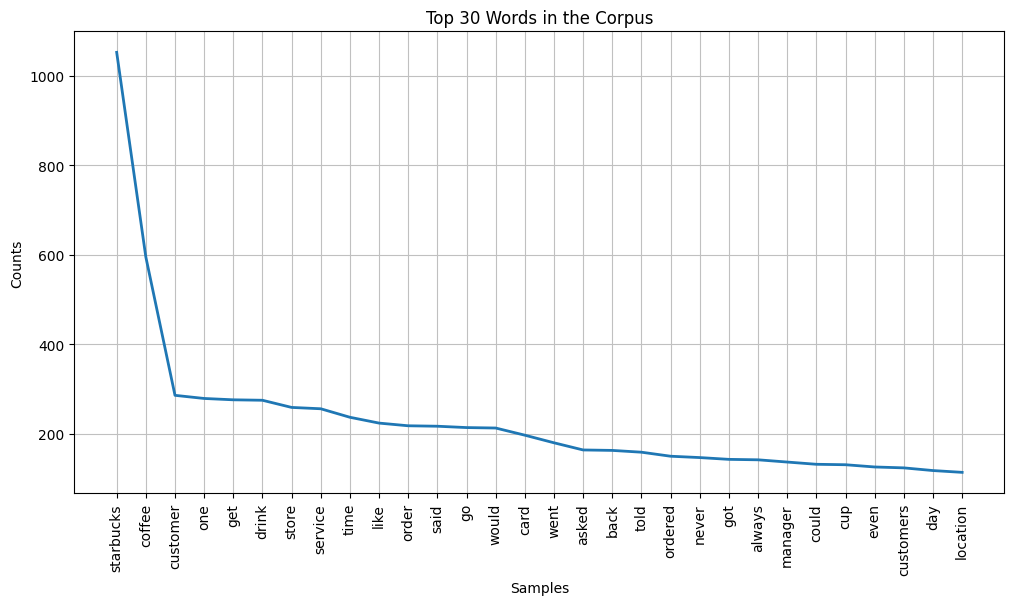

In [10]:
# Word frequency distribution
from nltk.probability import FreqDist

# Combine all documents into a single text
corpus = ' '.join(data['cleaned_text_review'])

# Tokenize and calculate word frequencies
words = word_tokenize(corpus)
word_freq = FreqDist(words)

# Plot the top N words
plt.figure(figsize=(12, 6))
word_freq.plot(30, title="Top 30 Words in the Corpus")
plt.show()

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each document
data['Sentiment_score'] = data['cleaned_text_review'].apply(lambda x: sid.polarity_scores(x)['compound'])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ankur/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
data

,name,location,Date,Rating,Review,Image_Links,cleaned_text_review,word_count,char_count,Sentiment_score
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],amber ladonna starbucks southwest parkway alwa...,26,179,0.8779
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],starbucks fire station 436 altamonte springs f...,51,345,0.9670
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,wanted go way recognize starbucks employee bil...,35,220,0.4215
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],friend starbucks card work thankful worker pai...,34,208,0.9623
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,kick drinking 5 cups warm water work instacart...,37,253,0.9723
...,...,...,...,...,...,...,...,...,...,...
845,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...,['No Images'],ordered two venti frappacino without whipped c...,26,196,-0.3182
846,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",NaN,No Review Text,['No Images'],review text,2,11,0.0000
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",['No Images'],demanded tips made wait coffees cold melted 20...,15,91,-0.5574
848,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",NaN,No Review Text,['No Images'],review text,2,11,0.0000


In [13]:
data[data.Review == 'No Review Text']

,name,location,Date,Rating,Review,Image_Links,cleaned_text_review,word_count,char_count,Sentiment_score
62,Sharon,"Culpeper, VA","Reviewed July 18, 2022",2.0,No Review Text,['No Images'],review text,2,11,0.0
100,Donald,"Orlando, FL","Reviewed Nov. 22, 2021",1.0,No Review Text,['No Images'],review text,2,11,0.0
793,Maureen,"Lakewood, WA","Reviewed March 25, 2009",NaN,No Review Text,['No Images'],review text,2,11,0.0
794,Maryellen,"Richmond, TX","Reviewed March 23, 2009",NaN,No Review Text,['No Images'],review text,2,11,0.0
795,Ben,"Shanghai, OTHER","Reviewed March 23, 2009",NaN,No Review Text,['No Images'],review text,2,11,0.0
796,Carla,"Cambridge, MA","Reviewed March 15, 2009",NaN,No Review Text,['No Images'],review text,2,11,0.0
797,Michelle,"Yorktown, VA","Reviewed March 14, 2009",NaN,No Review Text,['No Images'],review text,2,11,0.0
798,Katie,"Escondido, CA","Reviewed March 4, 2009",NaN,No Review Text,['No Images'],review text,2,11,0.0
799,Barry,"Okemos, MI","Reviewed Feb. 26, 2009",NaN,No Review Text,['No Images'],review text,2,11,0.0
800,Lori,"Chicago, IL","Reviewed Feb. 23, 2009",NaN,No Review Text,['No Images'],review text,2,11,0.0


In [14]:
def senti(x):
    if x >= 4:
        return 'Positive'
    elif x <= 2:
        return 'Negative'
    else:
        return 'Neutral'


data['Rating_type'] = data.Rating.apply(senti)

In [15]:
data.head(20)

,name,location,Date,Rating,Review,Image_Links,cleaned_text_review,word_count,char_count,Sentiment_score,Rating_type
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],amber ladonna starbucks southwest parkway alwa...,26,179,0.8779,Positive
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],starbucks fire station 436 altamonte springs f...,51,345,0.9670,Positive
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,wanted go way recognize starbucks employee bil...,35,220,0.4215,Positive
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],friend starbucks card work thankful worker pai...,34,208,0.9623,Positive
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,kick drinking 5 cups warm water work instacart...,37,253,0.9723,Positive
5,Alyssa,"Sunnyvale, TX","Reviewed Sept. 14, 2023",1.0,We had to correct them on our order 3 times. T...,['No Images'],correct order 3 times never got right manager ...,29,188,-0.8316,Negative
6,ken,"Spring Hill, FL","Reviewed Sept. 8, 2023",1.0,I have tried Starbucks several different times...,['No Images'],tried starbucks several different times differ...,20,136,0.0000,Negative
7,Nikki,"Asheville, NC","Reviewed Aug. 25, 2023",1.0,Starbucks near me just launched new fall foods...,['No Images'],starbucks near launched new fall foods beverag...,46,291,0.8885,Negative
8,Alex,"Reisterstown, MD","Reviewed Aug. 5, 2023",1.0,"I ordered online for the Reisterstown Rd, St T...",['No Images'],ordered online reisterstown rd st thomas sc 99...,25,142,-0.8316,Negative
9,Sunny,"Zionville, Other","Reviewed Aug. 4, 2023",1.0,Staff at the Smythe St. Superstore location in...,['No Images'],staff smythe superstore location fredericton n...,51,370,-0.7655,Negative


In [16]:
data.Rating.value_counts()

Rating
1.0    451
2.0     99
5.0     83
4.0     39
3.0     33
Name: count, dtype: int64

In [17]:
data.Rating.isnull().sum()     # Number of null valules in Rating

145

In [18]:
data[data.Rating.isnull()]

,name,location,Date,Rating,Review,Image_Links,cleaned_text_review,word_count,char_count,Sentiment_score,Rating_type
704,James,"Kansas City, MO","Reviewed July 25, 2011",NaN,I just wanted to amend my email the I sent to ...,['No Images'],wanted amend email sent hour ago rude obnoxiou...,24,136,-0.5994,Neutral
705,James,"Kansas City, MO","Reviewed July 25, 2011",NaN,"Recently, I have gone to your Starbucks at Bar...",['No Images'],recently gone starbucks barry rd kansas city m...,30,200,0.3038,Neutral
706,Mike,"Revere, ma","Reviewed June 26, 2011",NaN,Upon my first visit to this location on my way...,['No Images'],upon first visit location way work went get cu...,29,170,-0.2500,Neutral
707,Hughes,"Macclesfield, Other","Reviewed Jan. 13, 2011",NaN,"Recently, British Royal Marines in Iraq wrote ...",['No Images'],recently british royal marines iraq wrote star...,39,276,0.7430,Neutral
708,Sherrilynn,"Jenison, MI","Reviewed Jan. 4, 2011",NaN,"On the way to catch our plane, we got a medium...",['No Images'],way catch plane got medium coffee medium hot c...,40,258,0.9001,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
845,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...,['No Images'],ordered two venti frappacino without whipped c...,26,196,-0.3182,Neutral
846,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",NaN,No Review Text,['No Images'],review text,2,11,0.0000,Neutral
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",['No Images'],demanded tips made wait coffees cold melted 20...,15,91,-0.5574,Neutral
848,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",NaN,No Review Text,['No Images'],review text,2,11,0.0000,Neutral


In [19]:
# No Review Text in Null Ratings.

data[(data.Rating.isnull())&(data.Review == 'No Review Text')].head()

,name,location,Date,Rating,Review,Image_Links,cleaned_text_review,word_count,char_count,Sentiment_score,Rating_type
793,Maureen,"Lakewood, WA","Reviewed March 25, 2009",NaN,No Review Text,['No Images'],review text,2,11,0.0,Neutral
794,Maryellen,"Richmond, TX","Reviewed March 23, 2009",NaN,No Review Text,['No Images'],review text,2,11,0.0,Neutral
795,Ben,"Shanghai, OTHER","Reviewed March 23, 2009",NaN,No Review Text,['No Images'],review text,2,11,0.0,Neutral
796,Carla,"Cambridge, MA","Reviewed March 15, 2009",NaN,No Review Text,['No Images'],review text,2,11,0.0,Neutral
797,Michelle,"Yorktown, VA","Reviewed March 14, 2009",NaN,No Review Text,['No Images'],review text,2,11,0.0,Neutral


In [20]:
data[(data.Rating.isnull())&(data.Review == 'No Review Text')].shape

(35, 11)

In [21]:
# There is no outcome from in this data.
data[data.Review == 'No Review Text'].shape

(37, 11)

In [22]:
# dropping the No Review Text
l = list(data[data.Review == 'No Review Text'].index)
data.drop(index = l,inplace = True)

In [23]:
data[data.Rating.isnull()]

,name,location,Date,Rating,Review,Image_Links,cleaned_text_review,word_count,char_count,Sentiment_score,Rating_type
704,James,"Kansas City, MO","Reviewed July 25, 2011",NaN,I just wanted to amend my email the I sent to ...,['No Images'],wanted amend email sent hour ago rude obnoxiou...,24,136,-0.5994,Neutral
705,James,"Kansas City, MO","Reviewed July 25, 2011",NaN,"Recently, I have gone to your Starbucks at Bar...",['No Images'],recently gone starbucks barry rd kansas city m...,30,200,0.3038,Neutral
706,Mike,"Revere, ma","Reviewed June 26, 2011",NaN,Upon my first visit to this location on my way...,['No Images'],upon first visit location way work went get cu...,29,170,-0.2500,Neutral
707,Hughes,"Macclesfield, Other","Reviewed Jan. 13, 2011",NaN,"Recently, British Royal Marines in Iraq wrote ...",['No Images'],recently british royal marines iraq wrote star...,39,276,0.7430,Neutral
708,Sherrilynn,"Jenison, MI","Reviewed Jan. 4, 2011",NaN,"On the way to catch our plane, we got a medium...",['No Images'],way catch plane got medium coffee medium hot c...,40,258,0.9001,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
841,Mary,"Hillsboro, OR","Reviewed Dec. 16, 2007",NaN,"When using my debit card, how much and for how...",['No Images'],using debit card much long starbuck company pu...,14,88,0.0000,Neutral
842,Angie,"Innsbruck, OR","Reviewed Sept. 17, 2007",NaN,I just bought a starbucks thermos mug about a ...,['No Images'],bought starbucks thermos mug month half ago va...,26,160,0.0000,Neutral
844,Sabine,"Redondo Beach, CA","Reviewed Dec. 19, 2006",NaN,I'm (was) a regular customer who ordered a lat...,['No Images'],regular customer ordered latte tuesday woman n...,48,312,-0.0772,Neutral
845,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...,['No Images'],ordered two venti frappacino without whipped c...,26,196,-0.3182,Neutral


In [24]:
data[data.Rating==1].iloc[5,4]

"I filed a BBB complaint last month because Starbucks canceled my Starbucks Reward cards. I couldn't remember the balances, so I guessed about $9. Starbucks played nothing but games and tried everything they could to avoid responding to the complaint. I received a couple of phone call messages asking me to contact them directly and discuss the matter. The number provided was the customer service number and when I spoke with one representative, Linda hung up the phone on me. I did not use my card since 2012 which is my prerogative. Because of this and other reasons, Starbucks decided to close my Starbucks account. I reopened one about a few weeks ago and added a new card that I have not used yet."

In [25]:
# after analysing the reviews of Null rating we get that all the reviews are negative reviews. So we give 1 rating to all the Nan values here.

data['Rating'] = np.where(data.Rating.isnull(),1,data.Rating)

In [26]:
data.Rating.value_counts()

Rating
1.0    560
2.0     98
5.0     83
4.0     39
3.0     33
Name: count, dtype: int64

# Word Cloud & Top 10 occuring words for each rating

In [27]:
from wordcloud import WordCloud

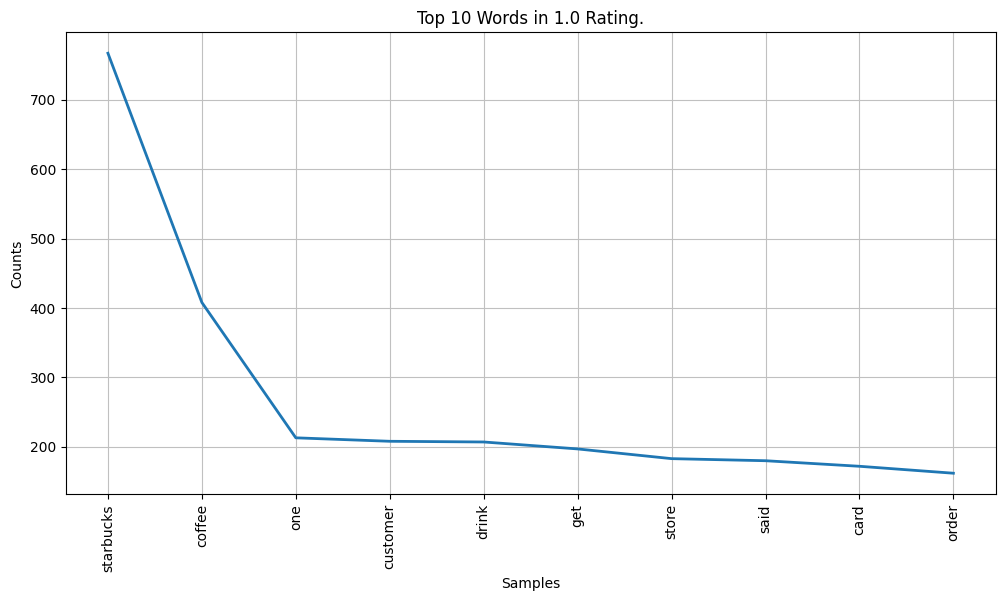

In [28]:
# Combine all documents into a single text
corpus_rating_1 = ' '.join(data[data.Rating == 1]['cleaned_text_review'])

# Tokenize and calculate word frequencies
words1 = word_tokenize(corpus_rating_1)
word_freq1 = FreqDist(words1)

# Plot the top N words
plt.figure(figsize=(12, 6))
word_freq1.plot(10, title="Top 10 Words in 1.0 Rating.")
plt.show()

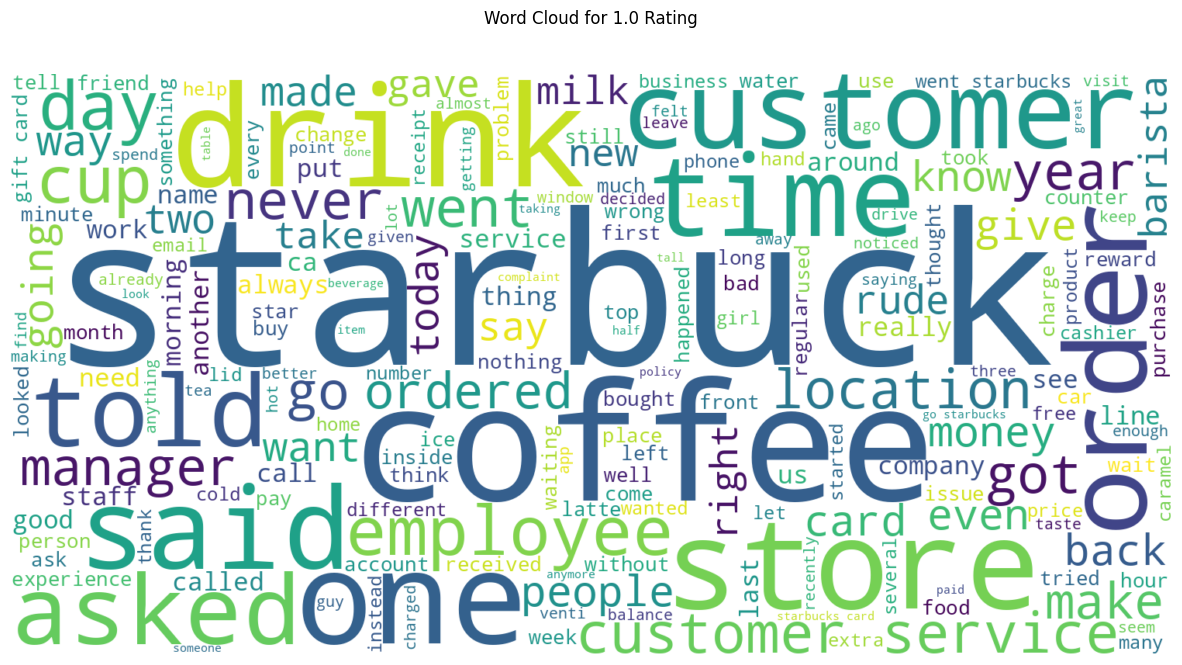

In [29]:
wordcloud = WordCloud(width = 1500, height =750, background_color='white').generate(corpus_rating_1)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for 1.0 Rating\n\n')
plt.show()

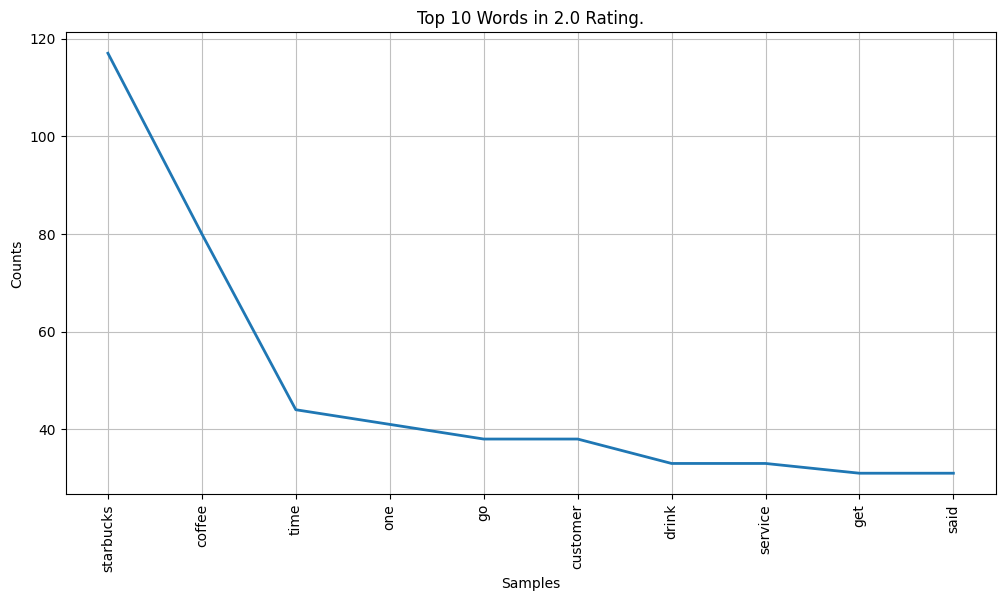

In [30]:
# Combine all documents into a single text
corpus_rating_2 = ' '.join(data[data.Rating == 2]['cleaned_text_review'])

# Tokenize and calculate word frequencies
words2 = word_tokenize(corpus_rating_2)
word_freq2 = FreqDist(words2)

# Plot the top N words
plt.figure(figsize=(12, 6))
word_freq2.plot(10, title="Top 10 Words in 2.0 Rating.")
plt.show()

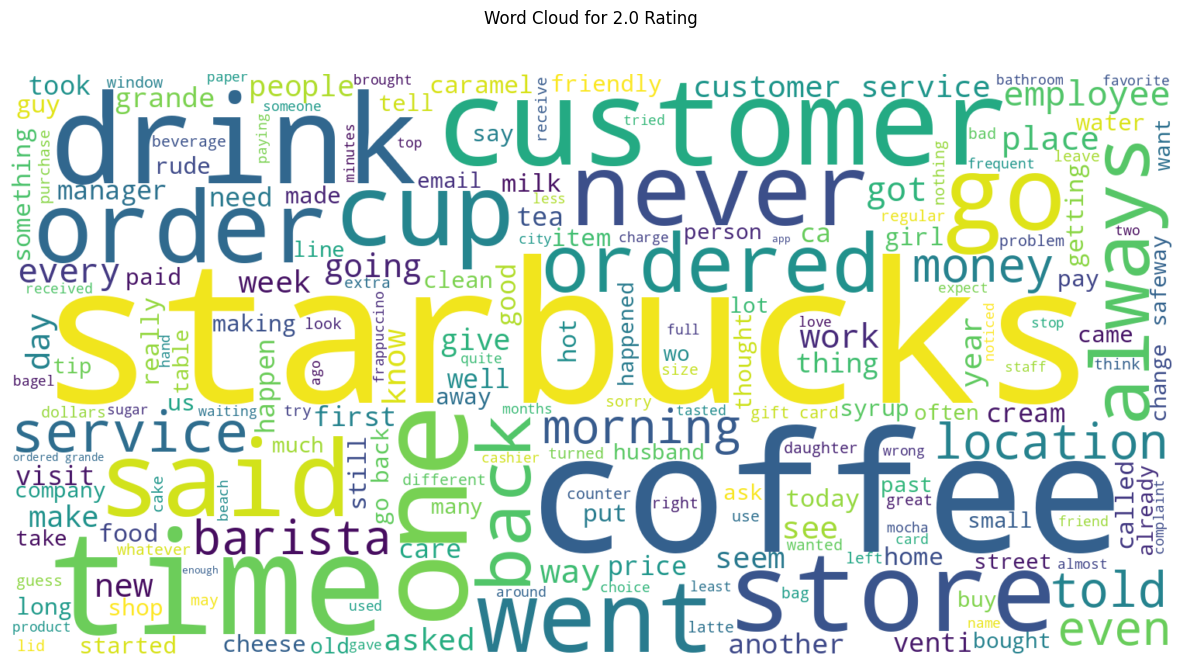

In [31]:
wordcloud = WordCloud(width = 1500, height =750, background_color='white').generate(corpus_rating_2)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for 2.0 Rating\n\n')
plt.show()

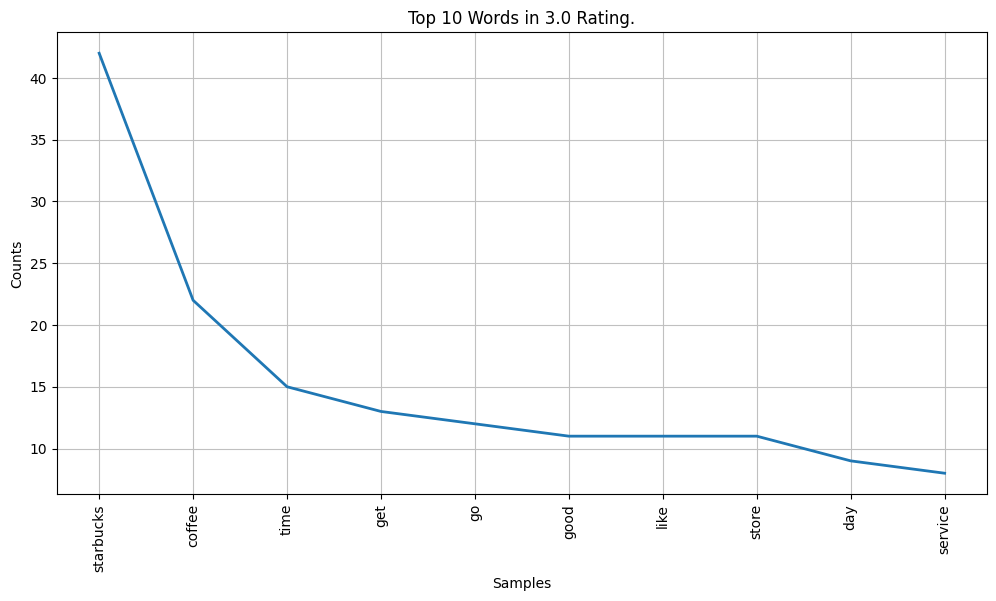

In [32]:
# Combine all documents into a single text
corpus_rating_3 = ' '.join(data[data.Rating == 3]['cleaned_text_review'])

# Tokenize and calculate word frequencies
words3 = word_tokenize(corpus_rating_3)
word_freq3 = FreqDist(words3)

# Plot the top N words
plt.figure(figsize=(12, 6))
word_freq3.plot(10, title="Top 10 Words in 3.0 Rating.")
plt.show()

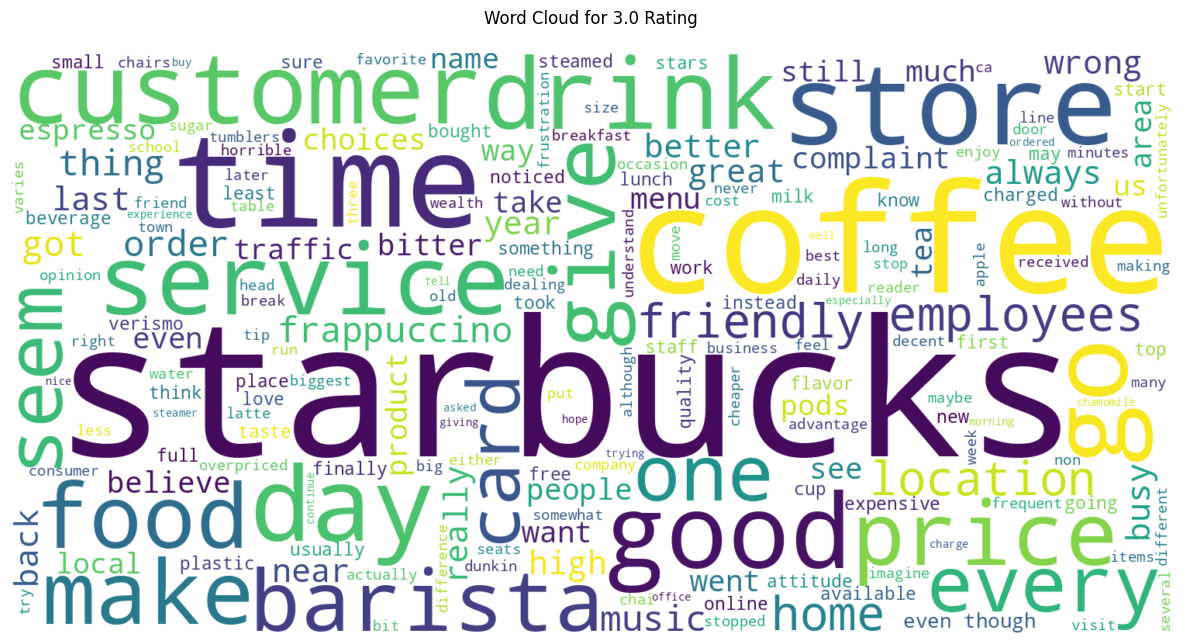

In [33]:
wordcloud = WordCloud(width = 1500, height =750, background_color='white').generate(corpus_rating_3)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for 3.0 Rating\n')
plt.show()

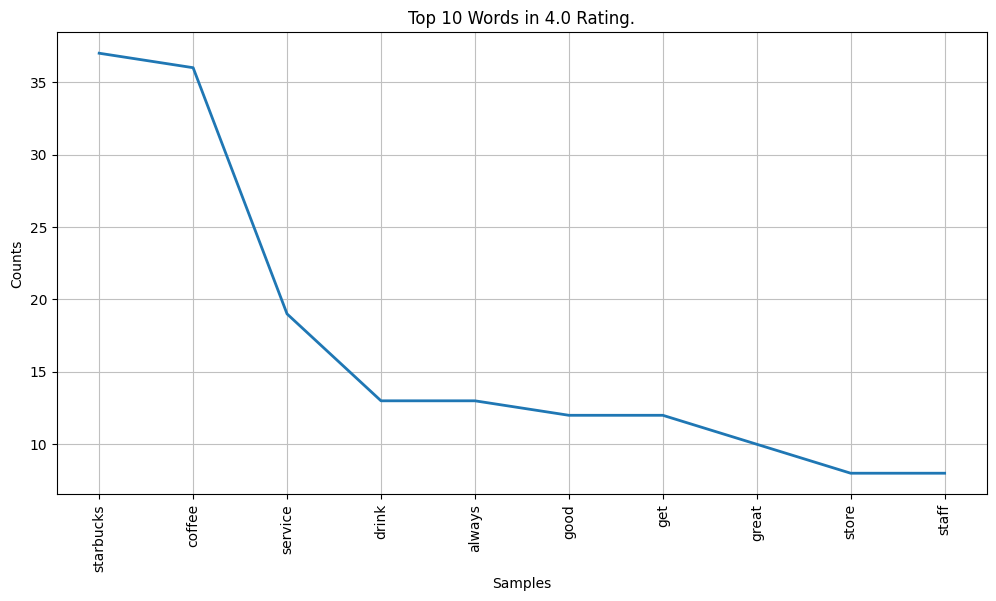

In [34]:
# Combine all documents into a single text
corpus_rating_4 = ' '.join(data[data.Rating ==4]['cleaned_text_review'])

# Tokenize and calculate word frequencies
words4 = word_tokenize(corpus_rating_4)
word_freq4 = FreqDist(words4)

# Plot the top N words
plt.figure(figsize=(12, 6))
word_freq4.plot(10, title="Top 10 Words in 4.0 Rating.")
plt.show()

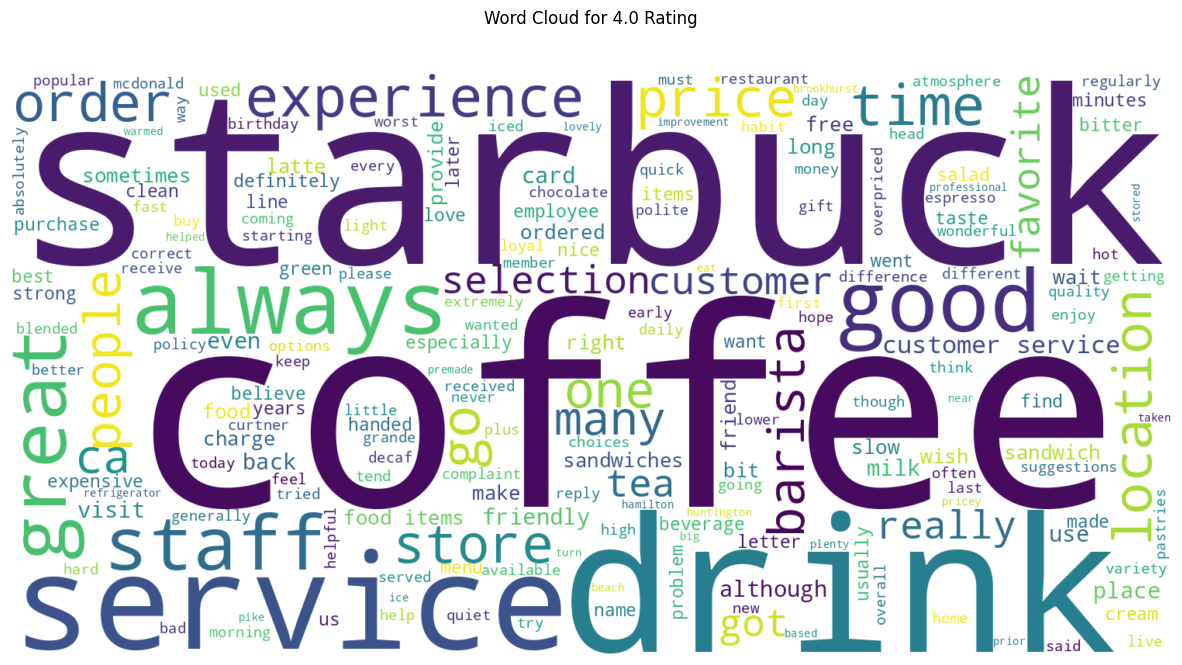

In [35]:
wordcloud = WordCloud(width = 1500, height =750, background_color='white').generate(corpus_rating_4)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for 4.0 Rating\n\n')
plt.show()

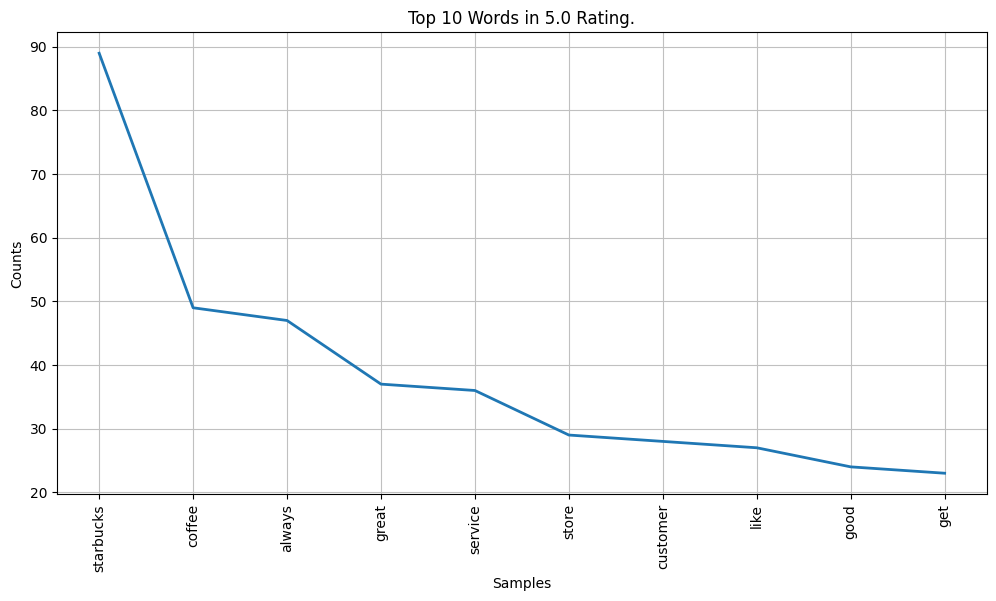

In [36]:
# Combine all documents into a single text
corpus_rating_5 = ' '.join(data[data.Rating == 5]['cleaned_text_review'])

# Tokenize and calculate word frequencies
words5 = word_tokenize(corpus_rating_5)
word_freq5 = FreqDist(words5)

# Plot the top N words
plt.figure(figsize=(12, 6))
word_freq5.plot(10, title="Top 10 Words in 5.0 Rating.")
plt.show()

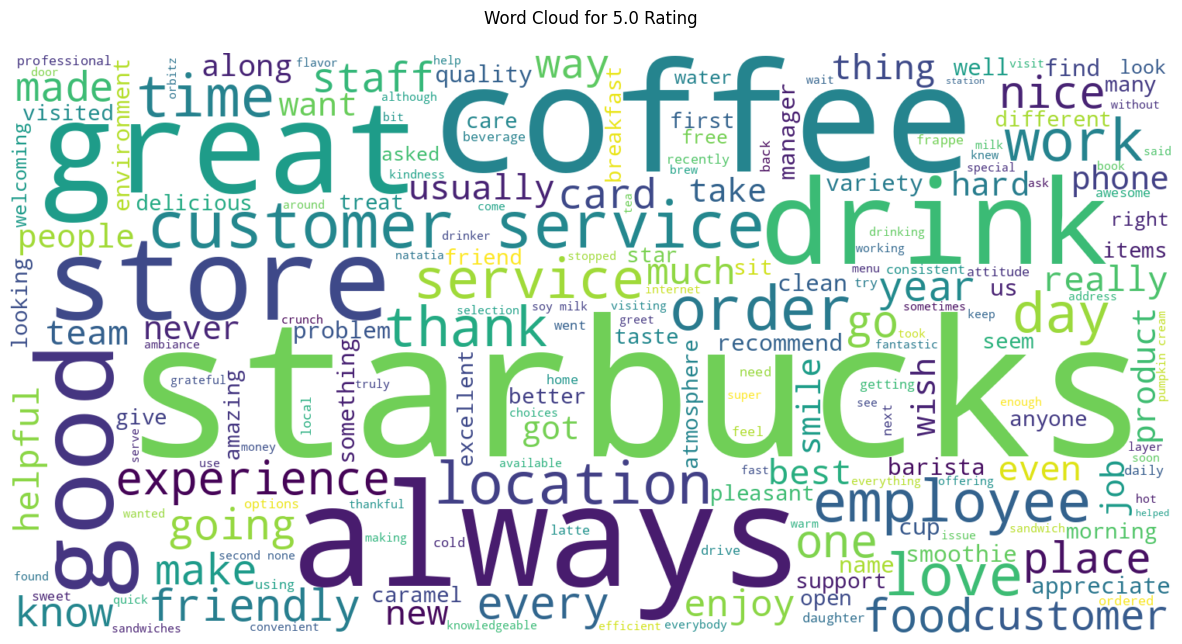

In [37]:
wordcloud = WordCloud(width = 1500, height =750, background_color='white').generate(corpus_rating_5)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for 5.0 Rating\n')
plt.show()

## Vectorization Techniques

#### 1. BOW (Bag Of Words)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(data['cleaned_text_review']).toarray()
cv_features = cv.get_feature_names_out()

In [40]:
print("Bag of Words Matrix:")
print(cv_matrix)
print("\n Features Names:")
print(cv_features)

Bag of Words Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

 Features Names:
['0403907' '06486' '09' ... 'zeeb' 'zero' 'zip']


In [41]:
cv_matrix.shape

(813, 5718)

#### 2. N-grams

##### Bigram

In [42]:
ngram_cv = CountVectorizer(ngram_range=(2,2))
ngram_cv_matrix = ngram_cv.fit_transform(data['cleaned_text_review']).toarray()
ngram_cv_features = ngram_cv.get_feature_names_out()

In [43]:
print("Bag of Words Matrix:")
print(ngram_cv_matrix)
print("\n Features Names:")
print(ngram_cv_features)

Bag of Words Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

 Features Names:
['0403907 ordered' '06486 carrying' '09 2014' ... 'zero stars'
 'zero stocks' 'zip starbuck']


In [44]:
ngram_cv_matrix.shape

(813, 29247)

##### Trigram

In [45]:
ngram3_cv = CountVectorizer(ngram_range=(3,3))
ngram3_cv_matrix = ngram3_cv.fit_transform(data['cleaned_text_review']).toarray()
ngram3_cv_features = ngram3_cv.get_feature_names_out()

In [46]:
print("Bag of Words Matrix:")
print(ngram3_cv_matrix)
print("\n Features Names:")
print(ngram3_cv_features)

Bag of Words Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

 Features Names:
['0403907 ordered ice' '06486 carrying new' '09 2014 reply' ...
 'zero service also' 'zero stars could' 'zero stocks able']


In [47]:
ngram3_cv_matrix.shape

(813, 33553)

##### Quad-gram

In [48]:
ngram4_cv = CountVectorizer(ngram_range=(2,3))
ngram4_cv_matrix = ngram4_cv.fit_transform(data['cleaned_text_review']).toarray()
ngram4_cv_features = ngram4_cv.get_feature_names_out()

In [49]:
print("Bag of Words Matrix:")
print(ngram4_cv_matrix)
print("\n Features Names:")
print(ngram4_cv_features)

Bag of Words Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

 Features Names:
['0403907 ordered' '0403907 ordered ice' '06486 carrying' ...
 'zero stocks' 'zero stocks able' 'zip starbuck']


In [50]:
ngram4_cv_matrix.shape

(813, 62800)

#### 3. TFIDF 

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
tfidf  = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['cleaned_text_review']).toarray()
features_names = tfidf.get_feature_names_out()

In [53]:
print("TF-IDF Matrix:")
print(tfidf_matrix)
print("\n Features Names:")
print(features_names)

TF-IDF Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

 Features Names:
['0403907' '06486' '09' ... 'zeeb' 'zero' 'zip']


In [54]:
ready_data = pd.DataFrame(data = tfidf_matrix,columns = features_names)

In [55]:
data.reset_index(inplace = True)

In [56]:
data.drop(columns='index',inplace = True)

In [57]:
ready_data['word_count']=data['word_count']

In [58]:
ready_data['char_count'] = data['char_count']

In [59]:
data.Rating = data.Rating.astype('int')

In [60]:
data.Rating = data.Rating-1

In [61]:
# Usinf 4 gram matrix
ready_data2 = pd.DataFrame(data = ngram4_cv_matrix, columns = ngram4_cv_features)

In [62]:
ready_data2['word_count']=data['word_count']

In [63]:
ready_data2['char_count'] = data['char_count']

In [64]:
ready_data2

,0403907 ordered,0403907 ordered ice,06486 carrying,06486 carrying new,09 2014,09 2014 reply,09 already,09 already bad,10 card,10 card free,...,zero regular card,zero service,zero service also,zero stars,zero stars could,zero stocks,zero stocks able,zip starbuck,word_count,char_count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,26,179
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,51,345
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,220
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,34,208
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,37,253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14,88
809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,26,160
810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,48,312
811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,26,196


In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
st = StandardScaler()
st_data = st.fit_transform(ready_data)

In [67]:
st_data = pd.DataFrame(st_data,columns= ready_data.columns)

In [68]:
from sklearn.preprocessing import Normalizer

In [69]:
nor = Normalizer()
nor_data = nor.fit_transform(st_data)

In [70]:
nor_ready_data = pd.DataFrame(nor_data, columns= st_data.columns)

### Modeling

In [71]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier

In [90]:
x = nor_ready_data
y = data.Rating

In [91]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=2)

In [92]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((569, 5720), (569,), (244, 5720), (244,))

#### Random Forest

In [96]:
rf = RandomForestClassifier(random_state=0)
rf_model = rf.fit(xtrain,ytrain)
pred = rf_model.predict(xtest)

In [97]:
accuracy = accuracy_score(ytest,pred)
precision = precision_score(ytest,pred,average='weighted')
recall = recall_score(ytest,pred,average='weighted')
f1 = f1_score(ytest,pred,average='weighted')

In [98]:
print('Accuracy score:',accuracy)
print('Precision score:',precision)
print('Recall Score:',recall)
print('F1 score:',f1)

Accuracy score: 0.7131147540983607
Precision score: 0.5893688876380778
Recall Score: 0.7131147540983607
F1 score: 0.6226478077972775


#### AdaBoost

In [195]:
ada = AdaBoostClassifier()
ada_model = ada.fit(xtrain,ytrain)
pred2 = ada_model.predict(xtest)

In [196]:
accuracy = accuracy_score(ytest,pred2)
precision = precision_score(ytest,pred2,average='weighted')
recall = recall_score(ytest,pred2,average='weighted')
f1 = f1_score(ytest,pred2,average='weighted')

In [197]:
print('Accuracy score:',accuracy)
print('Precision score:',precision)
print('Recall Score:',recall)
print('F1 score:',f1)

Accuracy score: 0.5983606557377049
Precision score: 0.5509507858363363
Recall Score: 0.5983606557377049
F1 score: 0.5711733621569687


#### XGBoost

In [ ]:
xgb = XGBClassifier()
xgb_model = xgb.fit(xtrain,ytrain)
pred3 = xgb_model.predict(xtest)

In [ ]:
accuracy = accuracy_score(ytest,pred3)
precision = precision_score(ytest,pred3,average='weighted')
recall = recall_score(ytest,pred3,average='weighted')
f1 = f1_score(ytest,pred3,average='weighted')

In [ ]:
print('Accuracy score:',accuracy)
print('Precision score:',precision)
print('Recall Score:',recall)
print('F1 score:',f1)

#### Naive Bayes

In [167]:
nb = GaussianNB()
nb_model = nb.fit(xtrain,ytrain)
pred4 = nb_model.predict(xtest)

In [168]:
accuracy = accuracy_score(ytest,pred4)
precision = precision_score(ytest,pred4,average='weighted')
recall = recall_score(ytest,pred4,average='weighted')
f1 = f1_score(ytest,pred4,average='weighted')

In [169]:
print('Accuracy score:',accuracy)
print('Precision score:',precision)
print('Recall Score:',recall)
print('F1 score:',f1)

Accuracy score: 0.036885245901639344
Precision score: 0.7142076502732241
Recall Score: 0.036885245901639344
F1 score: 0.010265165823071694


#### CatBoost

In [157]:
cat = CatBoostClassifier()
cat_model = cat.fit(xtrain,ytrain)
pred5 = cat_model.predict(xtest)

Learning rate set to 0.076884
0:	learn: 1.5073132	total: 87.2ms	remaining: 1m 27s
1:	learn: 1.4312752	total: 118ms	remaining: 58.7s
2:	learn: 1.3700544	total: 147ms	remaining: 49s
3:	learn: 1.3151153	total: 177ms	remaining: 44.2s
4:	learn: 1.2705360	total: 208ms	remaining: 41.3s
5:	learn: 1.2246817	total: 243ms	remaining: 40.3s
6:	learn: 1.1881025	total: 275ms	remaining: 39s
7:	learn: 1.1637828	total: 305ms	remaining: 37.8s
8:	learn: 1.1325036	total: 335ms	remaining: 36.9s
9:	learn: 1.1115335	total: 365ms	remaining: 36.1s
10:	learn: 1.0899875	total: 395ms	remaining: 35.5s
11:	learn: 1.0675628	total: 434ms	remaining: 35.7s
12:	learn: 1.0475723	total: 469ms	remaining: 35.6s
13:	learn: 1.0323123	total: 500ms	remaining: 35.2s
14:	learn: 1.0146103	total: 530ms	remaining: 34.8s
15:	learn: 0.9999551	total: 559ms	remaining: 34.4s
16:	learn: 0.9863877	total: 589ms	remaining: 34.1s
17:	learn: 0.9726373	total: 620ms	remaining: 33.8s
18:	learn: 0.9653201	total: 652ms	remaining: 33.7s
19:	learn: 0.

In [158]:
accuracy = accuracy_score(ytest,pred5)
precision = precision_score(ytest,pred5,average='weighted')
recall = recall_score(ytest,pred5,average='weighted')
f1 = f1_score(ytest,pred5,average='weighted')

In [159]:
print('Accuracy score:',accuracy)
print('Precision score:',precision)
print('Recall Score:',recall)
print('F1 score:',f1)

Accuracy score: 0.7377049180327869
Precision score: 0.6092038520914503
Recall Score: 0.7377049180327869
F1 score: 0.6611693629078111
